In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
from funcs import *
from robotClass import *

import time
import numpy as np
import matplotlib.pyplot as plt
import asyncio

LOG.propagate = False

### Lab 8


In [54]:
# Setup robot
rc = setupRobot()

2022-03-25 21:07:33,046 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:B0:6C:9A:3C
2022-03-25 21:07:35,908 | INFO     |: Connected to C0:83:B0:6C:9A:3C


In [ ]:
# Initialization
rc.pingRobot(clear = True, startX = 600)
rc.updatePID(300, 0.05, 0, 0.75, 1000, 200)

# Wait one second
await asyncio.sleep(1)

# Move forward without performing PID
rc.move_forward([50, 50], 0, 0)

In [ ]:
# After some time, perform flip
rc.pingRobot(performFlip = 1) # flips and moves backwards

In [ ]:
# Stop the robot once it moves back far enough
rc.stop()

Use PID and KF

In [55]:
# Ping robot to start writing PWM values to the characteristic
rc.pingRobot(clear = True, startX = 600)
rc.updatePID(300, 0.05, 0, 0.75, 1000, 200)

# Wait two seconds
await asyncio.sleep(2)

# Apply a constant PWM signal for enough time to reach steady state (constant speed)
rc.move_forward([50, 50], 0, 0) # PWM: 100, 0: forward, 0: do PID (no PWM adjustment)

# await asyncio.sleep(10) # start with 5 seconds but make it longer if needed
# rc.stop()
# await asyncio.sleep(2)

# # Ping robot to stop writing PWM values to the characteristic
# rc.pingRobot()

In [43]:
rc.pingRobot(clearAllDone = 1) # reset the robot to its initial state
rc.stop()

In [57]:
rc.kf_tof

[(0.0, 1648256860.436131),
 (0.0, 1648256860.496119),
 (0.0, 1648256860.5260742),
 (0.0, 1648256860.556329),
 (0.0, 1648256860.601656),
 (0.0, 1648256860.631673),
 (0.0, 1648256860.675951),
 (0.0, 1648256860.691065),
 (0.0, 1648256860.7210329),
 (0.0, 1648256860.751355),
 (0.0, 1648256860.781125),
 (0.0, 1648256860.8109372),
 (0.0, 1648256860.841326),
 (0.0, 1648256860.8709881),
 (0.0, 1648256860.9161012),
 (0.0, 1648256860.9460402),
 (0.0, 1648256860.976086),
 (0.0, 1648256861.005902),
 (0.0, 1648256861.0364878),
 (0.0, 1648256861.081082),
 (0.0, 1648256861.1119611),
 (0.0, 1648256861.1559942),
 (0.0, 1648256861.186294),
 (0.0, 1648256861.20261),
 (0.0, 1648256861.2317529),
 (0.0, 1648256861.2759318),
 (0.0, 1648256861.291379),
 (0.0, 1648256861.336906),
 (0.0, 1648256861.366144),
 (0.0, 1648256861.3967202),
 (0.0, 1648256861.4268422),
 (0.0, 1648256861.45595),
 (0.0, 1648256861.487026),
 (0.0, 1648256861.516879),
 (0.0, 1648256861.546361),
 (0.0, 1648256861.591943),
 (0.0, 1648256861

In [56]:
rc.tof2_readings

[(450.0, 1648256857.526807),
 (446.0, 1648256857.58596),
 (450.0, 1648256857.6911218),
 (462.0, 1648256857.795959),
 (454.0, 1648256857.871326),
 (438.0, 1648256857.97588),
 (465.0, 1648256858.081324),
 (445.0, 1648256858.186177),
 (455.0, 1648256858.276235),
 (468.0, 1648256858.380936),
 (462.0, 1648256858.471151),
 (468.0, 1648256858.5769532),
 (465.0, 1648256858.6666298),
 (453.0, 1648256858.756835),
 (446.0, 1648256858.876787),
 (472.0, 1648256858.952451),
 (463.0, 1648256859.0864398),
 (449.0, 1648256859.146878),
 (441.0, 1648256859.236234),
 (460.0, 1648256859.327007),
 (433.0, 1648256859.431875),
 (459.0, 1648256859.522399),
 (455.0, 1648256860.392056),
 (466.0, 1648256860.510977),
 (468.0, 1648256860.617179),
 (493.0, 1648256860.691914),
 (461.0, 1648256860.796268),
 (470.0, 1648256860.901021),
 (456.0, 1648256860.991324),
 (484.0, 1648256861.096693),
 (461.0, 1648256861.201946),
 (457.0, 1648256861.2770472),
 (475.0, 1648256861.381205),
 (459.0, 1648256861.4718451),
 (460.0, 1

In [49]:
# Get front ToF sensor output
frontTOFData = rc.tof2_readings
startTimeTOF = frontTOFData[0][1]

# Get KF ToF Sensor output
kfTOF = rc.kf_tof
startTimeKFTOF = kfTOF[0][1]

# Get speed data
# format: [ [velocities], [times] ]
speedData = distToVelocity(frontTOFData)

# Get motor PWM input
motorData = rc.motor_readings

# Get KF motor PWM
kfMotorData = rc.kf_motor_pwm

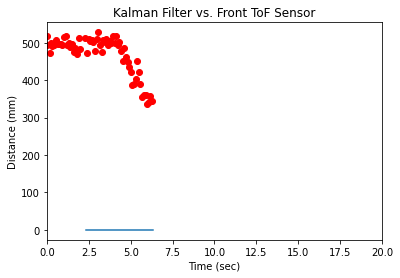

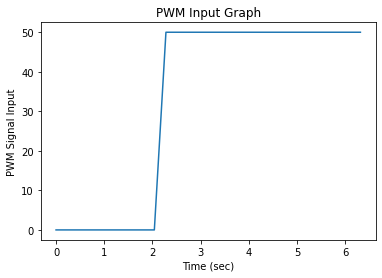

2022-03-25 21:07:12,222 | INFO     |: Disconnected from 607452C2-8441-D076-814E-841EB3635426


In [53]:
# Plot ---

# Front ToF Sensor Output
plotTOFData = dataForPlot(frontTOFData)
plotKFTOFData = dataForPlot(kfTOF)

plt.plot([x - startTimeTOF for x in plotTOFData[1]], plotTOFData[0], 'ro')
plt.plot([x - startTimeTOF for x in plotKFTOFData[1]], plotKFTOFData[0])

plt.title('Kalman Filter vs. Front ToF Sensor')
plt.xlim([0, 20])
plt.xlabel('Time (sec)')
plt.ylabel('Distance (mm)')
plt.show()

# Motor data
plotMotorData = dataForPlot(motorData)
startTimeMotor = plotMotorData[1][0]
plt.plot([x - startTimeMotor for x in plotMotorData[1]], plotMotorData[0])
plt.title('PWM Input Graph')
plt.xlabel('Time (sec)')
plt.ylabel('PWM Signal Input')
plt.show()